In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------------ --------------------------- 194.6/624.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 18.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 8.0 MB/s eta 0:0

In [5]:
from textblob import TextBlob

In [6]:
#regular expression
import re

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import classification_report,accuracy_score

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [13]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/bb/dc75933de86e6076f58cf68325877be952a97a371c26b252013f1258a5a7/shap-0.47.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   --------- ------------------------------ 122.9/544.4 kB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 409.6/544.4 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 4.9 MB/s eta 0:00:00


In [14]:
import shap

In [15]:
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010'],
    'Email_Text': [
        "I feel overwhelmed with the workload and I'm unsure about the deadlines.",
        "Everything is going well, looking forward to the team meeting tomorrow.",
        "I'm finding it hard to manage everything, I need more time.",
        "I'm happy with the tasks and the project, everything is manageable.",
        "Not sure how long I can keep up with all these deadlines, feeling exhausted.",
        "The project is going well, but I wish we had more resources.",
        "I'm a bit stressed about the workload, but trying to manage.",
        "Everything seems to be going fine, but the pressure is building.",
        "I need more time to finish everything. It's overwhelming.",
        "Everything is okay for now, but I feel a little disconnected."
    ],
    'Attrition_Label': ['At Risk', 'Stable', 'At Risk', 'Stable', 'At Risk', 'Stable', 'At Risk', 'Stable', 'At Risk', 'Stable']
}

In [16]:
df=pd.DataFrame(data)

In [17]:
df.head()

,Employee_ID,Email_Text,Attrition_Label
0,E001,I feel overwhelmed with the workload and I'm u...,At Risk
1,E002,"Everything is going well, looking forward to t...",Stable
2,E003,"I'm finding it hard to manage everything, I ne...",At Risk
3,E004,"I'm happy with the tasks and the project, ever...",Stable
4,E005,Not sure how long I can keep up with all these...,At Risk


In [18]:
def clean_text(text):
    text=re.sub(r'\s+',' ',text)
    text=re.sub(r'[^\w\s]','',text)
    text=text.lower()
    return text

In [20]:
df['Cleaned_Email']=df['Email_Text'].apply(clean_text)

In [21]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [31]:
def get_word_ratios(text):
    positive_words = ["good", "great", "fantastic", "excited", "happy", "satisfied"]
    negative_words = ["stress", "overwhelmed", "disappointed", "unhappy", "exhausted", "angry"]

    positive_count = sum(1 for word in text.split() if word in positive_words)
    negative_count = sum(1 for word in text.split() if word in negative_words)
    total_count = len(text.split())

    positive_ratio = positive_count / total_count if total_count != 0 else 0
    negative_ratio = negative_count / total_count if total_count != 0 else 0

    return positive_ratio, negative_ratio

In [32]:
df['Sentiment_polarity']=df['Cleaned_Email'].apply(get_sentiment)

In [33]:
df['postive_word_ratio'],df['negative_word_ratio']=zip(*df['Cleaned_Email'].apply(get_word_ratios))

In [34]:
df['word_count']=df['Cleaned_Email'].apply(lambda x: sum(1 for word in x.split()))

In [35]:
stress_terms=['stressed','overwhelmed','exahausted','burnout']

In [36]:
df['Stress_Term_Frequency']=df['Cleaned_Email'].apply(lambda x: sum(1 for word in x.split() if word in stress_terms))

In [37]:
df.head()

,Employee_ID,Email_Text,Attrition_Label,Cleaned_Email,Sentiment_polarity,postive_word_ratio,negative_word_ratio,word_count,Stress_Term_Frequency
0,E001,I feel overwhelmed with the workload and I'm u...,At Risk,i feel overwhelmed with the workload and im un...,0.000000,0.000000,0.083333,12,1
1,E002,"Everything is going well, looking forward to t...",Stable,everything is going well looking forward to th...,0.000000,0.000000,0.000000,11,0
2,E003,"I'm finding it hard to manage everything, I ne...",At Risk,im finding it hard to manage everything i need...,0.104167,0.000000,0.000000,11,0
3,E004,"I'm happy with the tasks and the project, ever...",Stable,im happy with the tasks and the project everyt...,0.800000,0.090909,0.000000,11,0
4,E005,Not sure how long I can keep up with all these...,At Risk,not sure how long i can keep up with all these...,-0.233333,0.000000,0.071429,14,0


In [38]:
df["Attrition_Label"]=df['Attrition_Label'].map({'At Risk':1,'Stable':0})

In [39]:
df.head()

,Employee_ID,Email_Text,Attrition_Label,Cleaned_Email,Sentiment_polarity,postive_word_ratio,negative_word_ratio,word_count,Stress_Term_Frequency
0,E001,I feel overwhelmed with the workload and I'm u...,1,i feel overwhelmed with the workload and im un...,0.000000,0.000000,0.083333,12,1
1,E002,"Everything is going well, looking forward to t...",0,everything is going well looking forward to th...,0.000000,0.000000,0.000000,11,0
2,E003,"I'm finding it hard to manage everything, I ne...",1,im finding it hard to manage everything i need...,0.104167,0.000000,0.000000,11,0
3,E004,"I'm happy with the tasks and the project, ever...",0,im happy with the tasks and the project everyt...,0.800000,0.090909,0.000000,11,0
4,E005,Not sure how long I can keep up with all these...,1,not sure how long i can keep up with all these...,-0.233333,0.000000,0.071429,14,0


In [42]:
x=df[['Sentiment_polarity','postive_word_ratio','negative_word_ratio','word_count','Stress_Term_Frequency']]

In [44]:
y=df['Attrition_Label']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train.head()

,Sentiment_polarity,postive_word_ratio,negative_word_ratio,word_count,Stress_Term_Frequency
5,0.500000,0.0,0.000000,12,0
0,0.000000,0.0,0.083333,12,1
7,0.416667,0.0,0.000000,11,0
2,0.104167,0.0,0.000000,11,0
9,0.156250,0.0,0.000000,11,0


In [47]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [48]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred=model.predict(x_test)

In [51]:
print(y_pred)

[0 1]


In [52]:
accuracy=accuracy_score(y_test,y_pred)

In [53]:
print(accuracy*100)

0.0


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [55]:
explainer = shap.TreeExplainer(model)

In [57]:
shap_values = explainer.shap_values(x_test)


C:\Users\SEC\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\SEC\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:761: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


<Figure size 640x480 with 0 Axes>

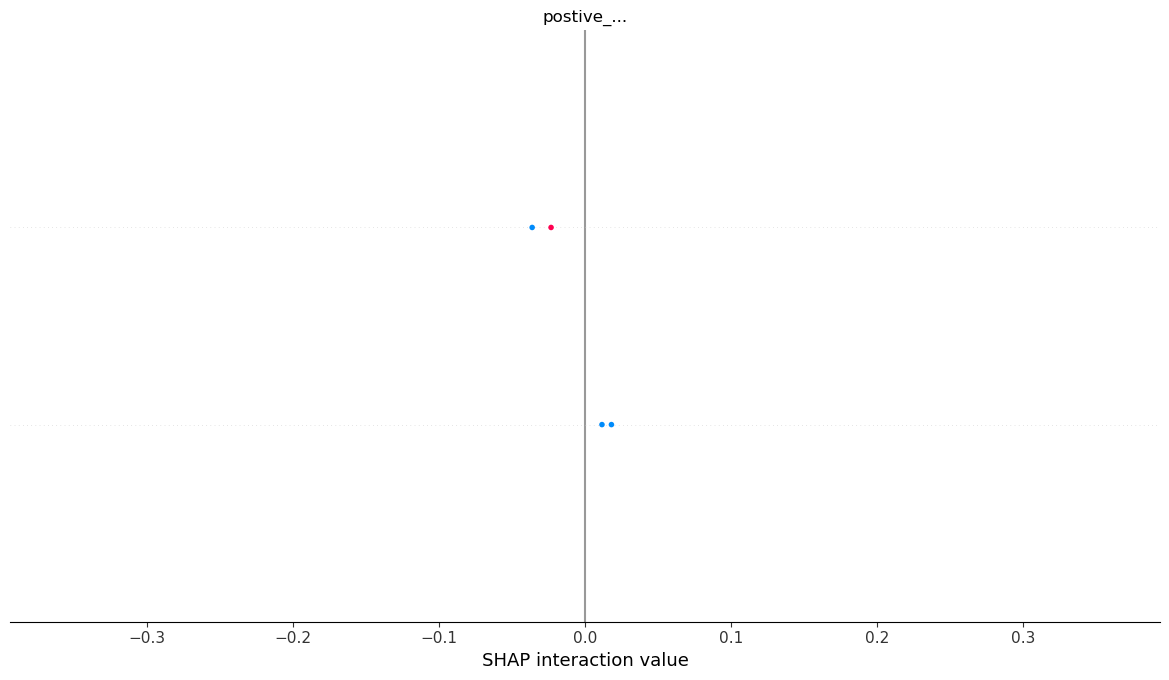

In [59]:
shap.summary_plot(shap_values, x_test)

In [80]:
sample_email = "I feel happy and excited."

In [81]:
sample_email_cleaned=clean_text(sample_email)

In [82]:
print(sample_email_cleaned)

i feel happy and excited


In [83]:
sample_sentiment=get_sentiment(sample_email_cleaned)

In [84]:
sample_positive_ratio, sample_negative_ratio = get_word_ratios(sample_email_cleaned)

In [85]:
sample_word_count = len(sample_email_cleaned.split())

In [86]:
sample_stress_term_freq = sum(1 for word in sample_email_cleaned.split() if word in stress_terms)


In [87]:
sample_data = pd.DataFrame([[sample_sentiment, sample_positive_ratio, sample_negative_ratio, sample_word_count, sample_stress_term_freq]],
                           columns=['Sentiment_Polarity', 'Positive_Word_Ratio', 'Negative_Word_Ratio', 'Word_Count', 'Stress_Term_Frequency'])


In [88]:
sample_data.head()

,Sentiment_Polarity,Positive_Word_Ratio,Negative_Word_Ratio,Word_Count,Stress_Term_Frequency
0,0.5875,0.4,0.0,5,0


In [89]:
sample_data = pd.DataFrame([[sample_sentiment, sample_positive_ratio, sample_negative_ratio, sample_word_count, sample_stress_term_freq]],
                           columns=['Sentiment_polarity', 'postive_word_ratio', 'negative_word_ratio', 'word_count', 'Stress_Term_Frequency'])

# Ensure the column names match the training data exactly
sample_data = sample_data.rename(columns={
    'postive_word_ratio': 'postive_word_ratio',  # No change
    'negative_word_ratio': 'negative_word_ratio',  # No change
    'word_count': 'word_count',  # No change
    'Sentiment_polarity': 'Sentiment_polarity'  # No change
})

In [90]:
sample_prediction = model.predict(sample_data)
print(sample_prediction)

[0]


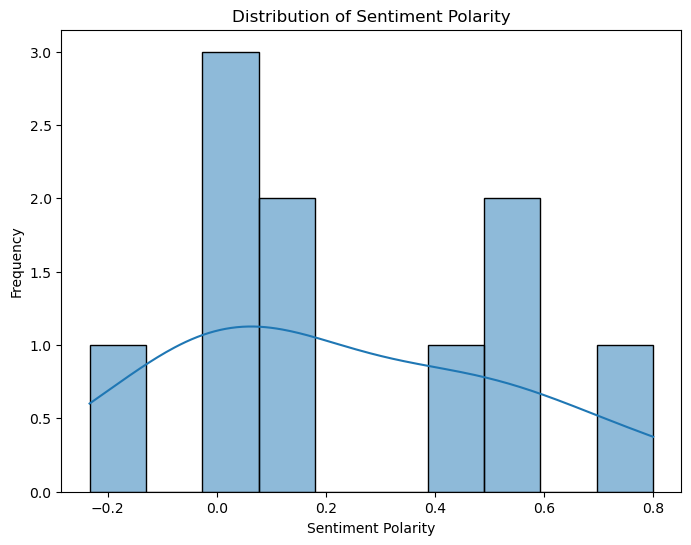

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment_polarity'], kde=True, bins=10)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()